Epoch 1/20


c:\Users\shara\.conda\envs\machinelearn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8174 - loss: 0.5995 - val_accuracy: 0.9578 - val_loss: 0.1367
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9570 - loss: 0.1460 - val_accuracy: 0.9703 - val_loss: 0.0995
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9701 - loss: 0.0959 - val_accuracy: 0.9727 - val_loss: 0.0937
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9786 - loss: 0.0700 - val_accuracy: 0.9758 - val_loss: 0.0886
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9814 - loss: 0.0589 - val_accuracy: 0.9768 - val_loss: 0.0827
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9827 - loss: 0.0541 - val_accuracy: 0.9772 - val_loss: 0.0797
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9865 - loss: 0.0428 - val_accuracy: 0.9796 - val_loss: 0.0795
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9874 - loss: 0.0395 - val_accuracy: 0.9782 - val_

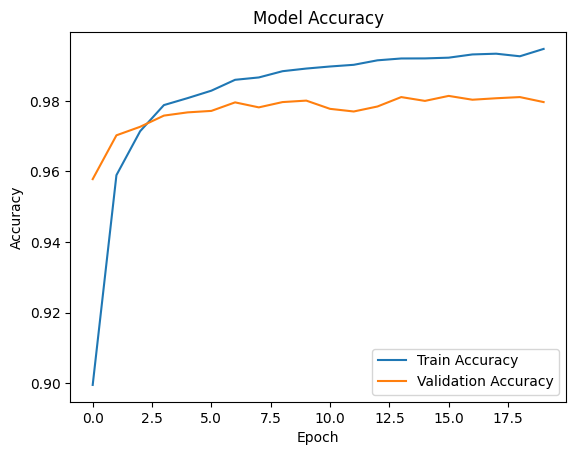

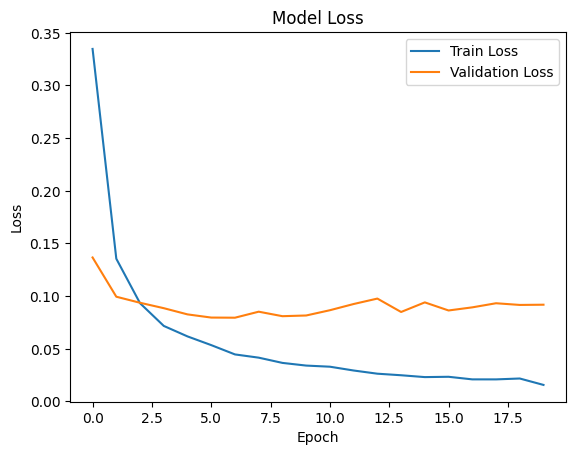

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


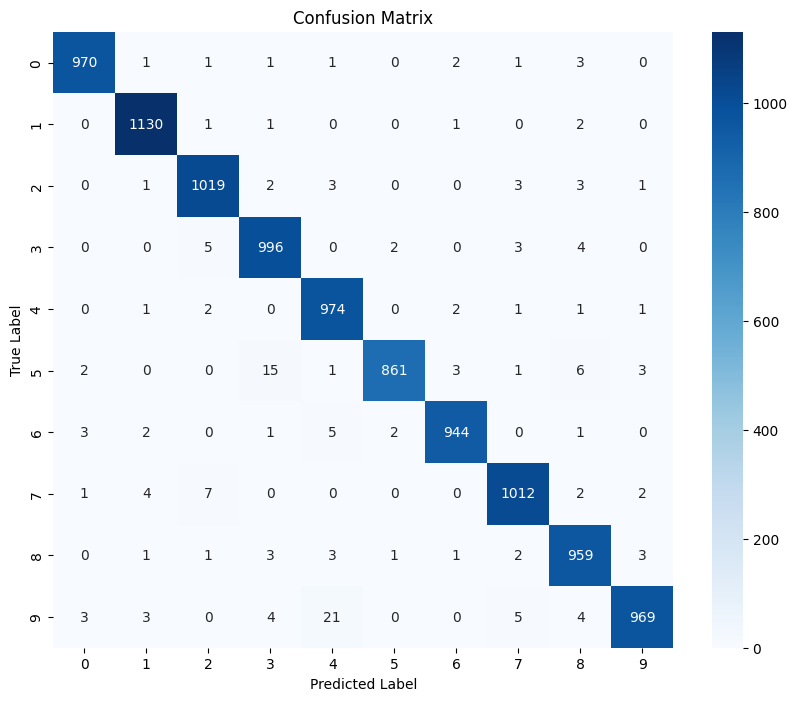

In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

def load_data_preprocess():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Normalize images
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Flatten images
    x_train = x_train.reshape(-1, 28 * 28)
    x_test = x_test.reshape(-1, 28 * 28)

    # Convert labels to one-hot encoding
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train(model, x_train, y_train):
    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=20,
        validation_split=0.2,
        verbose=1
    )
    return history, model

# Main program
(x_train, y_train), (x_test, y_test) = load_data_preprocess()
model = create_model()
history, model = train(model, x_train, y_train)

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to class indices

cm = confusion_matrix(y_true, y_pred_classes)

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 266s 2us/step


c:\Users\shara\.conda\envs\machinelearn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.1797 - loss: 2.2578 - val_accuracy: 0.3200 - val_loss: 1.8802
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.2945 - loss: 1.9243 - val_accuracy: 0.3419 - val_loss: 1.8169
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.3184 - loss: 1.8576 - val_accuracy: 0.3527 - val_loss: 1.8007
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.3349 - loss: 1.8281 - val_accuracy: 0.3736 - val_loss: 1.7825
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.3494 - loss: 1.8002 - val_accuracy: 0.3856 - val_loss: 1.7473
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.3567 - loss: 1.7729 - val_accuracy: 0.3829 - val_loss: 1.7275
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.3619 - loss: 1.7655 - val_accuracy: 0.4008 - val_loss: 1.7001
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.3681 - loss: 1.7411 - 

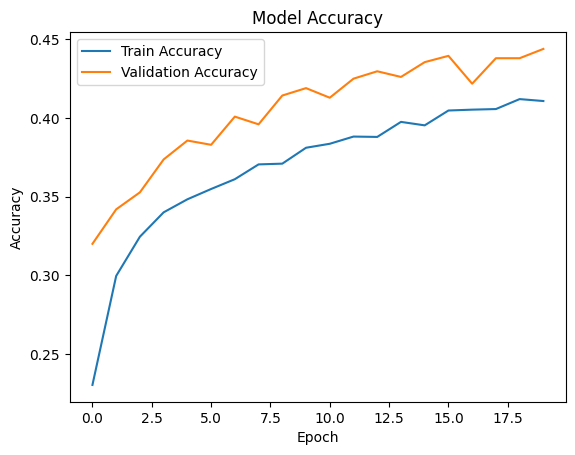

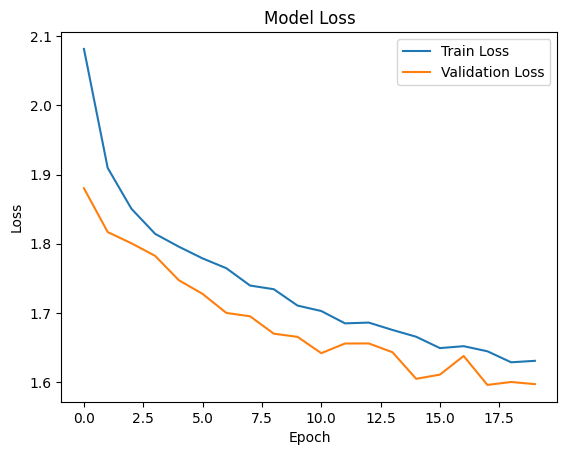

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


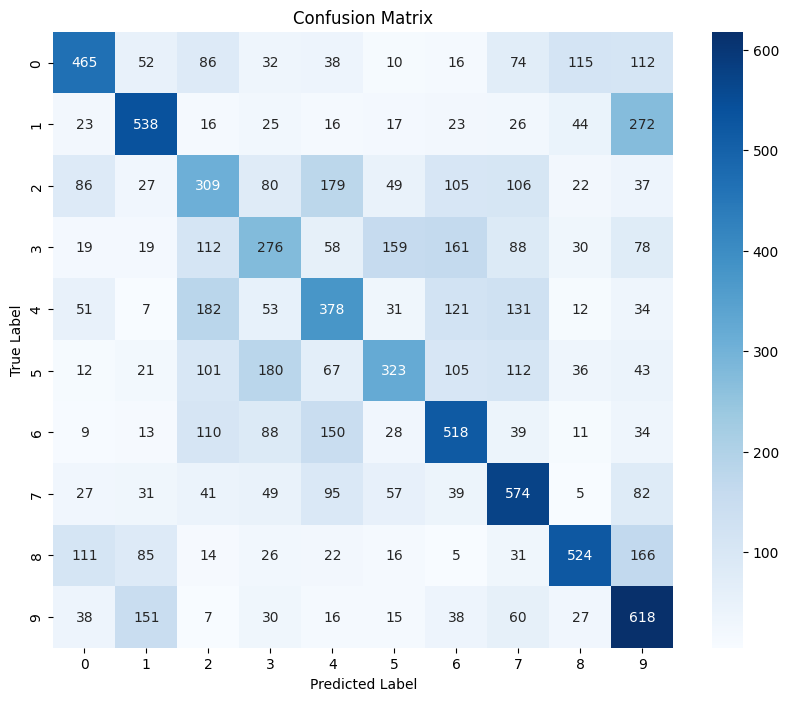

In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Load and Preprocess the CIFAR-10 Dataset
def load_cifar10_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Normalize the images to [0, 1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Flatten the images
    x_train = x_train.reshape(-1, 32 * 32 * 3)
    x_test = x_test.reshape(-1, 32 * 32 * 3)

    # Convert labels to one-hot encoding
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

# Step 2: Create the MLP Model
def create_mlp_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, activation='relu', input_shape=(32 * 32 * 3,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 3: Train the Model
def train_model(model, x_train, y_train):
    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=20,
        validation_split=0.2,
        verbose=1
    )
    return history, model

# Step 4: Visualize Training Performance
def plot_training_performance(history):
    # Accuracy plot
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Loss plot
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Step 5: Evaluate and Visualize Confusion Matrix
def plot_confusion_matrix(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)

    # Confusion Matrix Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Main Program
(x_train, y_train), (x_test, y_test) = load_cifar10_data()
model = create_mlp_model()
history, model = train_model(model, x_train, y_train)
plot_training_performance(history)
plot_confusion_matrix(model, x_test, y_test)
